# Reducing Noise in Photos Using OpenCV

## **“Adaptive Noise Reduction: Smart Filtering for Enhanced Image Quality”**

**Topic:**

5. Reducing Noise in Photos

    Use the denoising code to clean noisy images and compare the before-and-after effects.


**Revised Topic:**

Title: “Adaptive Noise Reduction: Smart Filtering for Enhanced Image Quality”

Rather than using the same noise-reduction method across the entire image, this approach customizes the filtering process to suit different parts of the image:

    - Areas with heavy noise receive stronger filtering to smooth out imperfections.*

    - Regions with fine textures are carefully preserved to maintain their details and sharpness.*

### Importing Libraries

In [ ]:
# importing OpenCV, OS, NumPy, MatPlotLib
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

### Parameters and File Loading

In [10]:
# Path to the folder containing images
input_folder = 'IMAGES'

# List all image files in the folder
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

### Converting Image to HSV

In [11]:
# HSV background threshold values
lower_bg = np.array([0, 0, 0])  # Lower HSV boundary
upper_bg = np.array([180, 255, 100])  # Upper HSV boundary

### Loop for Masking, Denoising, and Plotting a Comparison of every Image

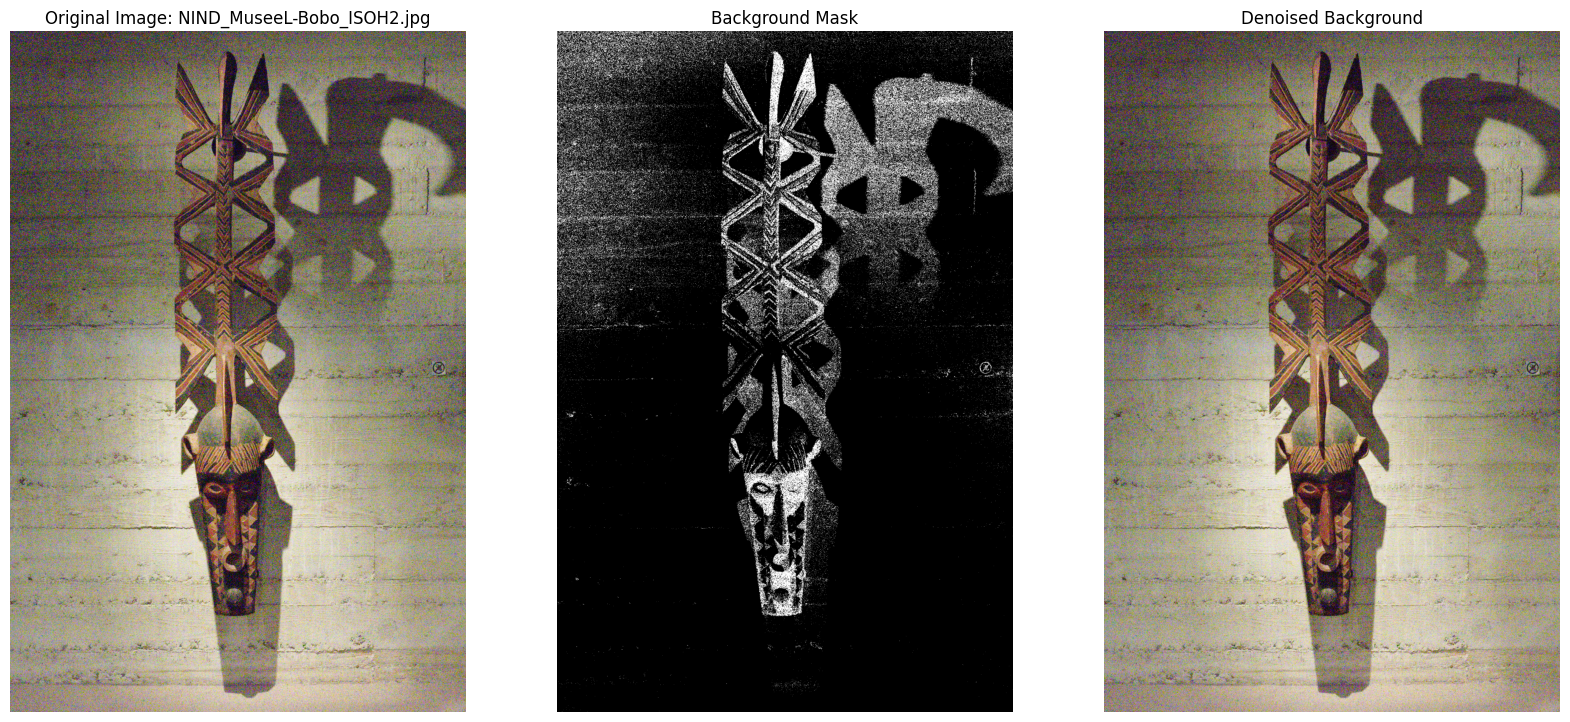

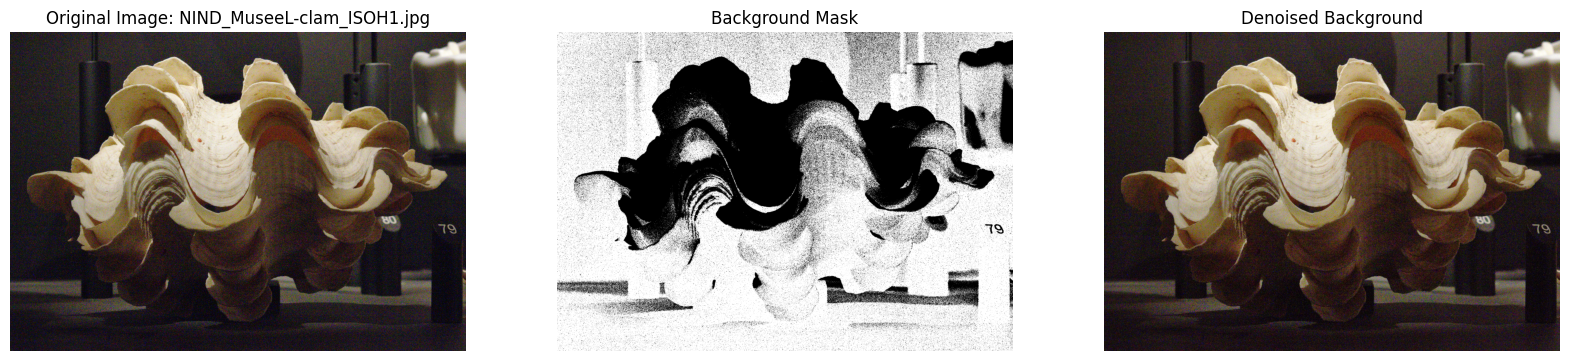

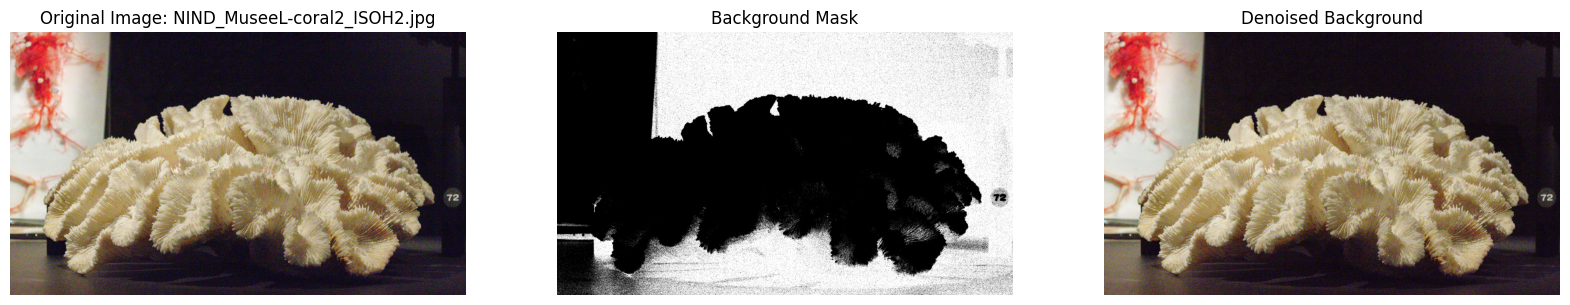

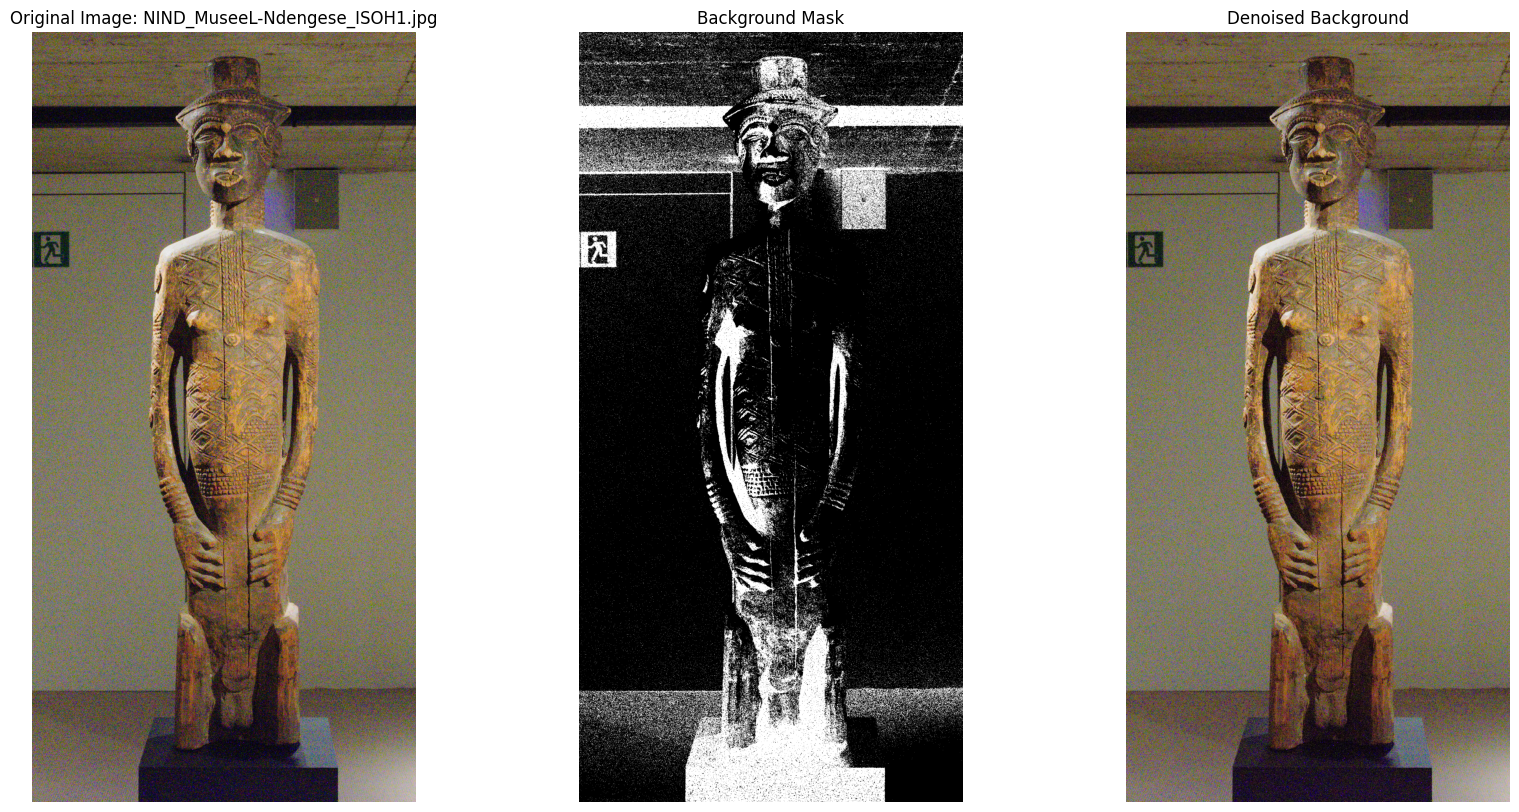

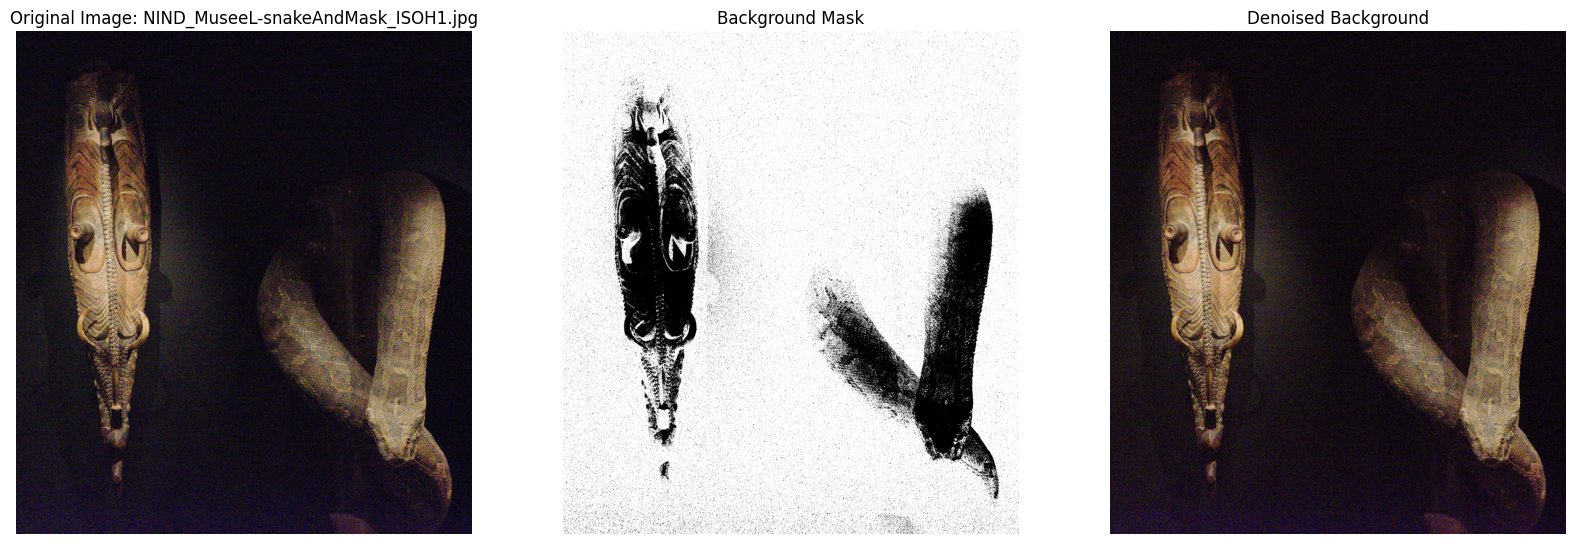

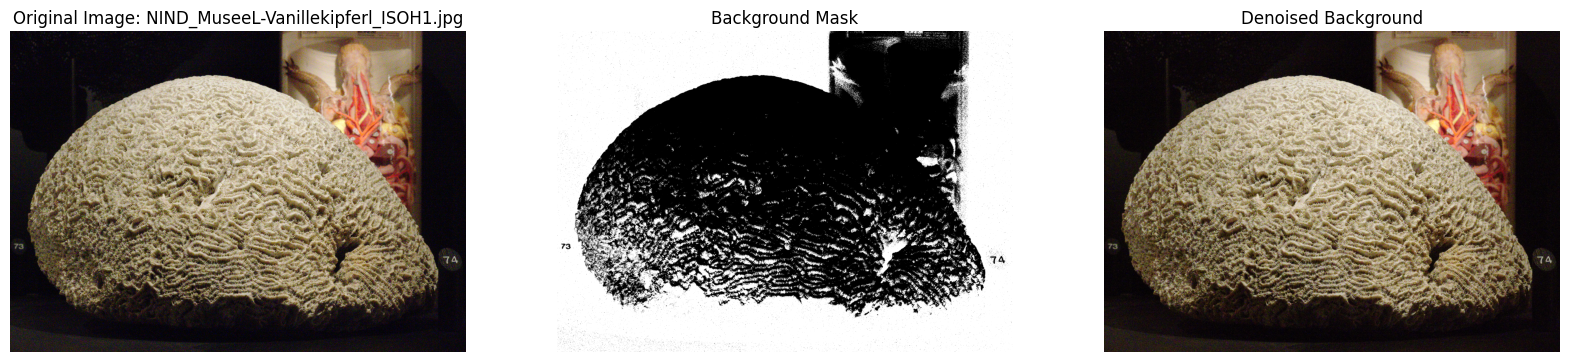

In [12]:
# For all images
for image_file in image_files:
    # Load the images
    image_path = os.path.join(input_folder, image_file)
    image = cv2.imread(image_path)
    
    # Convert to HSV for segmentation
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Create a mask for the background
    background_mask = cv2.inRange(hsv_image, lower_bg, upper_bg)
    
    # Invert the mask for the foreground
    foreground_mask = cv2.bitwise_not(background_mask)
    
    # Apply denoising to the background
    background = cv2.fastNlMeansDenoisingColored(image, None, 11, 20, 7, 21)
    denoised_background = cv2.bitwise_and(background, background, mask=background_mask)
    
    # Keep the original foreground unchanged
    foreground = cv2.bitwise_and(image, image, mask=foreground_mask)
    
    # Combine the denoised background and the original foreground
    result = cv2.add(denoised_background, foreground)
    
    # Display the original, mask, and processed images side by side
    row, col = 1, 3
    fig, axs = plt.subplots(row, col, figsize=(20, 10))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title(f'Original Image: {image_file}')
    axs[0].axis('off')

    axs[1].imshow(background_mask, cmap='gray')
    axs[1].set_title('Background Mask')
    axs[1].axis('off')

    axs[2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axs[2].set_title('Denoised Background')
    axs[2].axis('off')

    plt.show()
